In [1]:
import pandas as pd
import numpy as np

pd.__version__, np.__version__

('0.24.1', '1.15.4')

**Why did we import pandas? Because pandas is the defacto dataframe manipulation library of python and we are about downlaoading a data set.**

Let's fetch the zipped file from github and unzip it to get the full bank details using !wget

In [ ]:
!wget https://github.com/Blackman9t/Machine_Learning/blob/master/bank-additional.zip?raw=true -O bank_data.zip; unzip bank_data.zip; rm bank_data.zip;

--2020-04-13 21:12:03--  https://github.com/Blackman9t/Machine_Learning/blob/master/bank-additional.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Blackman9t/Machine_Learning/raw/master/bank-additional.zip [following]
--2020-04-13 21:12:03--  https://github.com/Blackman9t/Machine_Learning/raw/master/bank-additional.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/bank-additional.zip [following]
--2020-04-13 21:12:03--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/bank-additional.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP req

In [2]:
# Let's see the files in the folder
! ls bank-additional

bank-additional.csv  bank-additional-full.csv  bank-additional-names.txt


Next, let's read the file to a pandas data frame and remember to ask pandas sep elements by semicolon, not comma. This file is sep by semicolon.

In [3]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


To know more about the data, see the [data-dictionary-link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

In [4]:
print(df.shape)

(41188, 21)


Look at the two code cells below and try to guess what they do...

In [5]:
import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [6]:
model = Sequential([Flatten(input_shape=(28,28)),
                   Dense(128, activation='relu'),
                   Dense(10, activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.


The first code-cell above imports the keras library for deep_learning (neural network computation). It also imports two layers:-Dense and Flatten, and finally imports a Sequential model.
<br>The second code-cell builds the model by stacking the layers. The Flatten layer takes the inputs of shape (28,28) and flattens them into a vector of 28*28 elements. This is the first layer or the input layer of the neural network. <br>The first Dense layer is the hidden layer and has 128 nodes or neurons each receiving inputs from each input layer. This Dense layer activates the Relu (Rectified Linear unit) function on the neurons. <br>Then the second Dense layer has 10 neurons representing the 10 possible outcomes of the model. It activates the Softmax function that returns the probabilities of each possible outcome. <br>Obviously the outcome with the greatest probability score becomes the model's prediction.  

let's keep building the deep learning neural network model.

In [7]:
# let's load the data ansd split into training and testing sets with labels.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
print('train_images shape is {}'.format(train_images.shape))
print('train_labels shape is {}'.format(train_labels.shape))
print('test_images shape is {}'.format(test_images.shape))
print('test_labels shape is {}'.format(test_labels.shape))

train_images shape is (60000, 28, 28)
train_labels shape is (60000,)
test_images shape is (10000, 28, 28)
test_labels shape is (10000,)


In [9]:
# let's define class names for our target outputs
class_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boot']

In [10]:
# let's see the unique classes in our target
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
train_images = train_images/255
test_images = test_images/255

In [12]:
# let's compile the model with an optimizer, loss-func and a metric for evaluation.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Now let's train the model with the data
model.fit(train_images, train_labels, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.4971 - acc: 0.8261
Epoch 2/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.3743 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.3363 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.3104 - acc: 0.8867
Epoch 5/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.2950 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.2799 - acc: 0.8954
Epoch 7/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.2686 - acc: 0.9012
Epoch 8/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.2564 - acc: 0.9046
Epoch 9/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.2477 - acc: 0.9072
Epoch 10/10
60000/60000 [=========

In [14]:
# Let's evaluate our model on the test data set
test_loss, test_accy = model.evaluate(test_images, test_labels, verbose=1)

10000/10000 [==============================] - 2s 217us/step


In [15]:
print('Test Accuracy: ', test_accy)

Test Accuracy:  0.88


89% accuracy on test data ain't bad atall. But it's always best to be somewhat skeptical of our model to protect ourselves from confirmation biases.

## LALE with REGRESSION EXAMPLE

**About lale:**

Lale is a Python library for semi-automated data science. Lale makes it easy to automatically select algorithms and tune hyperparameters of pipelines that are compatible with scikit-learn, in a type-safe fashion. If you are a data scientist who wants to experiment with automated machine learning, this library is for you! Lale adds value beyond scikit-learn along three dimensions: automation, correctness checks, and interoperability. For automation, Lale provides a consistent high-level interface to existing pipeline search tools including GridSearchCV, SMAC, and Hyperopt. For correctness checks, Lale uses JSON Schema to catch mistakes when there is a mismatch between hyperparameters and their type, or between data and operators. And for interoperability, Lale has a growing library of transformers and estimators from popular libraries such as scikit-learn, XGBoost, PyTorch etc. Lale can be installed just like any other Python package and can be edited with off-the-shelf Python tools such as Jupyter notebooks.

In [16]:
# first let's install lale

try:
    !pip install lale
    print('lale installed success!')
except Exception as e:
    print(e)

lale installed success!


In [17]:
# now let's import sklearn and the lale libraries

import sklearn as sk
import lale

In [18]:
# let's load the carlifornia housing data set
cal_housing = sk.datasets.fetch_california_housing()

# Let's load it to a pandas data frame
x = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
y = cal_housing.target

In [19]:
print(type(y))
y

<class 'numpy.ndarray'>


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Let's see x and y

In [20]:
pd.concat([x.head(), pd.DataFrame(y).head()],axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let's make a Pipeline based on this data, using PCA to reduce the dimensionality of the data.

In [21]:
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor as Tree
from lale.lib.lale import Hyperopt
import lale.helpers
lale.wrap_imported_operators()

We use the Regression-Based decision tre since we can see that the y value is a continuous flow

In [22]:
pipe = Normalizer >> Tree

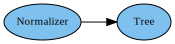

In [23]:
pipe.visualize()

Let's split the data into 80% training and 20% testing sets

In [24]:
from sklearn.model_selection import train_test_split

train_x, train_y, test_x, test_y = train_test_split(x,y, test_size=0.2, random_state=0)

Let's train a Tree based model using lale auto-configure

In [25]:
pipe_trainable = Hyperopt(estimator = pipe, cv = 3, max_evals = 10)

In [26]:
pipe_trained = pipe_trainable.fit(train_x, train_y)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 10%|█         | 1/10 [00:00<00:01,  7.62trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 20%|██        | 2/10 [00:00<00:01,  5.45trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 30%|███       | 3/10 [00:00<00:01,  6.07trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 40%|████      | 4/10 [00:00<00:00,  6.69trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 50%|█████     | 5/10 [00:00<00:00,  6.26trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 60%|██████    | 6/10 [00:01<00:00,  5.25trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 70%|███████   | 7/10 [00:01<00:00,  6.12trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 80%|████████  | 8/10 [00:01<00:00,  6.81trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

 90%|█████████ | 9/10 [00:01<00:00,  7.13trial/s, best loss=?]

  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 100, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 93, in hyperopt_train_test
    raise e
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/lib/lale/hyperopt.py", line 73, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring, args_to_scorer=self.args_to_scorer)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/lale/helpers.py", line 194, in cross_val_score_track_trials
    for train, test in cv.split(X, y):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py", line 323, in split
    X, y, groups = indexable(X, y, groups)
  File "/opt/conda/envs/Python36/lib/pytho

100%|██████████| 10/10 [00:01<00:00,  4.96trial/s, best loss=?]


AllTrialsFailed: 

In [ ]:
# tree_trained = tree_plan.auto_configure(train_x, train_y, optimizer= Hyperopt, cv=3, scoring='r2') 

**INTUITION:**
    
The reason why we use PCA is because we want to reduce the dimensionality of the data.
<br>Doing this allows us to compact the variance from the input data into as few dimensions as possible, Curse of Dimensionality.
<br>We use a Tree Regressor because we want to understand the impact the independent variables have on the dependent variable. Also, the dependent variable is continuous and fit for a Regressor algorithm.

In [ ]:
tree_trained.pretty_print(Ipython_display=True, show_imports=False)

In [ ]:
tree_trained.visualize()

In [ ]:
import sklearn.metrics
predicted = tree_trained.predict(test_x)
# print(f'R2 score {sklearn.metrics.r2_score(test_y, predicted):.2f}')